In [ ]:
# Assignment 4
                                                      # Name - Rajat Goyal
                                                      # Roll No. - 197267
                                                      # Section - B
#Implementing polynomial regression from scratch

import pandas as pd
import numpy as np


# reading csv file
df = pd.read_csv("Position_Salaries.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
# Chosing Independent and Dependent Feature
# As Salary increases with level increases
# Salary - Dependent Feature
# Level - Independent Feature

X = df['Level'].values
Y = df['Salary'].values

print("Independent Feature :-\n",X)
print("Dependent Feature :-\n",Y)

Independent Feature :-
 [ 1  2  3  4  5  6  7  8  9 10]
Dependent Feature :-
 [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
# Scaling of the dataset [Standardization of the data]
# here Scaling of Independent Data will be done
# for scaling we need to import StandardScaler()

from sklearn.preprocessing import StandardScaler
# Scaling
scaler = StandardScaler()

X = scaler.fit_transform(X)
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [ ]:
# as higher degree can't be 1-D so we need to reshape data
# Reshaping the independent feature
X = X.reshape(-1,1)
print(X)
print(Y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
# Split a dataset into 80/20 train/test set 
num_of_rows = (int)(len(X) * 0.8)

np.random.shuffle(X) #shuffles data to make it random
train_data = values[:num_of_rows] #indexes rows for training data
test_data = values[num_of_rows:] #indexes rows for test data

X_train = X[:num_of_rows]
Y_train = Y[:num_of_rows]
X_test =  X[num_of_rows:]
Y_test =  Y[num_of_rows:]

print("Independent Training Feature :-\n",X_train)
print("Independent Testing Feature :-\n",X_test)
print("Dependent Training Feature :-\n",Y_train)
print("Dependent Testing Feature :-\n",Y_test)

Independent Training Feature :-
 [[-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 1.5666989 ]
 [-1.5666989 ]
 [ 0.87038828]
 [ 1.21854359]
 [-1.21854359]]
Independent Testing Feature :-
 [[-0.87038828]
 [-0.52223297]]
Dependent Training Feature :-
 [ 110000  150000  200000 1000000   45000  300000  500000   50000]
Dependent Testing Feature :-
 [60000 80000]


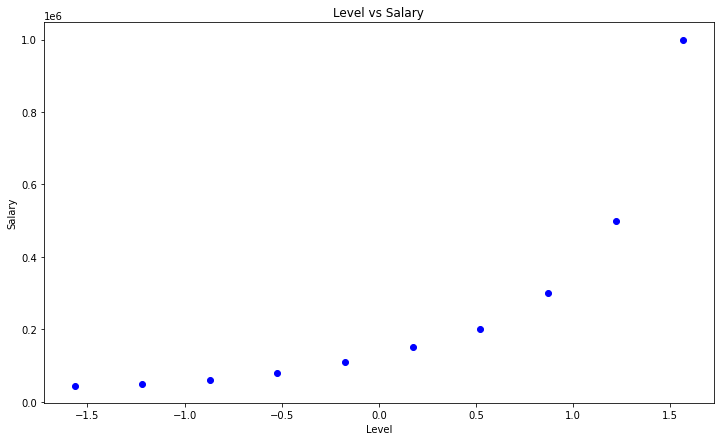

In [ ]:
# Plot the dataset( independent variable vs dependent variable)

# To plot dataset we will use matplotib library
import matplotlib.pyplot as plt

# figsize is a tuple of the width and height of the figure in inches
plt.figure(figsize = (12,7))

# Scatter Plot of Training Dataset
plt.scatter(X, Y, color='blue')
plt.title('Level vs Salary')
plt.ylabel('Salary')
plt.xlabel('Level')
plt.show()

In [ ]:
# To concatenates polynomials of independent feature to X_train
def polynomial_features(features, x):
  data = pd.DataFrame(np.zeros((x.shape[0],features)))
  for i in range(1,features+1):
    data.loc[:,i-1] = (x**i).reshape(-1,1)
  X_poly = np.array(data.values.tolist())
  return X_poly

# Example :- polynomial array of degree 3
x3 = polynomial_features(3,X)
x3

array([[-1.5666989 ,  2.45454545, -3.84553367],
       [-1.21854359,  1.48484848, -1.80935261],
       [-0.87038828,  0.75757576, -0.65938506],
       [-0.52223297,  0.27272727, -0.14242717],
       [-0.17407766,  0.03030303, -0.00527508],
       [ 0.17407766,  0.03030303,  0.00527508],
       [ 0.52223297,  0.27272727,  0.14242717],
       [ 0.87038828,  0.75757576,  0.65938506],
       [ 1.21854359,  1.48484848,  1.80935261],
       [ 1.5666989 ,  2.45454545,  3.84553367]])

In [ ]:
from math import sqrt

def predict(row, coefficients):
	y_pred = coefficients[0]
	for i in range(len(row)):
		y_pred += coefficients[i + 1] * row[i]
	return y_pred

def coefficients_sgd(x_train, y_train, alpha, n_epoch):
	coef = [0.0 for i in range(len(x_train[0])+1)]
	for epoch in range(n_epoch):
		sum_error = 0
		for i in range(len(x_train)):
			y_pred = predict(x_train[i], coef)
			error = y_pred - y_train[i]
			sum_error += error**2
			coef[0] = coef[0] - alpha * error
			for j in range(len(x_train[i])):
				coef[j + 1] = coef[j + 1] - alpha * error * x_train[i][j]
	return coef

# To Test the Dataset
def test_data(x_test, b):
    test_pred = []
    for i in range(len(x_test)):
        y_pred = predict(x_test[i], b)
        test_pred.append(y_pred)
    return test_pred

# To find Y functio
def find_y_function(x, coef):
  y_func = list()
  for i in range(len(x)):
    val = predict(x[i], coef)
    y_func.append(val)
  return y_func

# To calculate Root Square Mean Value
def RSME(actual, predict):
  error = 0.0
  for i in range(len(actual)):
    pred_error = actual[i] - predict[i]
    error += (pred_error ** 2)
  mean_error = error/float(len(actual))
  return sqrt(mean_error)

Theta :-  [243327.854217496, 252451.95183788246]
Predicted testing data :-  [-64295.8539041591, 550951.562339151]
Root Mean Squared Error :  88486.16819729871


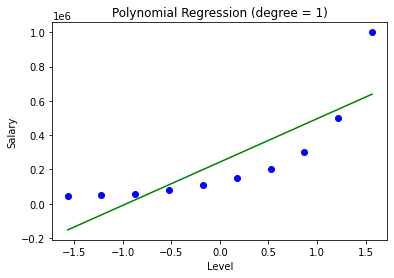

In [ ]:
import matplotlib.pyplot as plt
# Checking for degree 1
n_epochs = 10000 # number of iteration
alpha = 0.001 # learning rate

# Applying Gradient Decent Algorithm
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 0.8)
coef = coefficients_sgd(X_train, Y_train, alpha, n_epochs)

# printing theta values
print("Theta :- ",coef)

# Testing Dataset
test_pred = test_data(X_test, coef)
print("Predicted testing data :- ", test_pred)

# Calculating RSME value
rsme = RSME(Y_test, test_pred)
print("Root Mean Squared Error : ",rsme)

y_1 = find_y_function(X, coef)
# plot the data
plt.scatter(X[:, 0], Y, color = 'blue')
plt.plot(X[:, 0], y_1, color = 'green')
plt.title('Polynomial Regression (degree = 1)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

Theta :-  [ 58021.728 245142.063 172801.734]
Predicted testing data :-  [-24436.647 -22871.794]
Root Mean Squared Error :  94106.7300606456


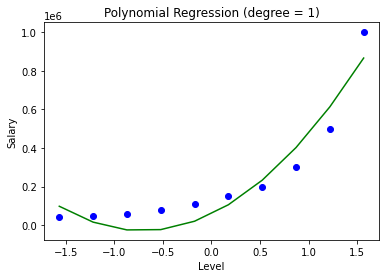

In [ ]:
# Checking for degree 2
n_epochs = 10000 # number of iteration
alpha = 0.001 # learning rate

# Applying Gradient Decent Algorithm
X_poly = polynomial_features(2, X)
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, 0.8)
coef = coefficients_sgd(X_train, Y_train, alpha, n_epochs)

# printing theta values
print("Theta :- ",np.around(coef, 3))

# Testing Dataset
test_pred = test_data(X_test, coef)
print("Predicted testing data :- ", np.around(test_pred, 3))

# Calculating RSME value
rsme = RSME(Y_test, test_pred)
print("Root Mean Squared Error : ",rsme)

y_2 = find_y_function(X_poly, coef)
# plot the data
y_reshaped = Y
y_reshaped.reshape(len(Y),1)
plt.scatter(X[:, 0], y_reshaped, color = 'blue')
plt.plot(X[:, 0], y_2, color = 'green')
plt.title('Polynomial Regression (degree = 1)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

Theta :-  [123961.884 119520.265  73376.836  19181.271]
Predicted testing data :- [413261.703 565083.154]
Root Mean Squared Error :-  313589.0581200371


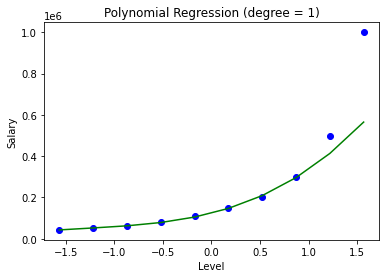

In [ ]:
# Checking for degree 3
n_epochs = 10000 # number of iteration
alpha = 0.001 # learning rate

# Applying Gradient Decent Algorithm
X_poly = polynomial_features(3, X)
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, 0.8)
coef = coefficients_sgd(X_train, Y_train, alpha, n_epochs)

# printing theta values
print("Theta :- ",np.around(coef, 3))

# Testing Dataset
test_pred = test_data(X_test, coef)
print("Predicted testing data :-", np.around(test_pred, 3))

# Calculating RSME value
rsme = RSME(Y_test, test_pred)
print("Root Mean Squared Error :- ",rsme)

y_2 = find_y_function(X_poly, coef)
# plot the data
y_reshaped = Y
y_reshaped.reshape(len(Y),1)
plt.scatter(X[:, 0], y_reshaped, color = 'blue')
plt.plot(X[:, 0], y_2, color = 'green')
plt.title('Polynomial Regression (degree = 1)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

Theta :-  [120016.56   70342.571  52741.218  94925.807  45473.282]
Predicted testing data [134402.347 556057.379]
Root Mean Squared Error :-  41144.358543124086


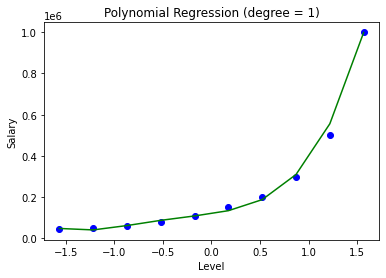

In [ ]:
# Checking for degree 4
n_epochs = 10000 # number of iteration
alpha = 0.001 # learning rate

# Applying Gradient Decent Algorithm
X_poly = polynomial_features(4, X)
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, 0.8)
coef = coefficients_sgd(X_train, Y_train, alpha, n_epochs)

# printing theta values
print("Theta :- ",np.around(coef, 3))

# Testing Dataset
test_pred = test_data(X_test, coef)
print("Predicted testing data", np.around(test_pred, 3))

# Calculating RSME value
rsme = RSME(Y_test, test_pred)
print("Root Mean Squared Error :- ",rsme)

y_2 = find_y_function(X_poly, coef)
# plot the data
y_reshaped = Y
y_reshaped.reshape(len(Y),1)
plt.scatter(X[:, 0], y_reshaped, color = 'blue')
plt.plot(X[:, 0], y_2, color = 'green')
plt.title('Polynomial Regression (degree = 1)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('197231_DSc_4.ipynb')

--2022-02-07 18:04:52--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-02-07 18:04:52 (25.0 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/197231_DSc_4.ipynb to pdf
[NbConvertApp] Support files will be in 197231_DSc_4_files/
[NbConvertApp] Making directory ./197231_DSc_4_files
[NbConvertApp] Making directory ./197231_DSc_4_files
[NbConvertApp] Making directory ./197231_DSc_4_files
[NbConvertApp] Making directory ./197231_DSc_4_files
[NbConve

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'